In [ ]:
'''
Sprint 1 : EDA, Feature Engineering, Data Manipulation, Data Visualization
Sprint 2 : Hypothesis Test, CI, Bayesian
Sprint 3 : DR, PCA, Cluster
'''

In [ ]:
from google.colab import files
upload= files.upload()

# 1. 데이터 EDA Exploratory Data Analysis





In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

upload= 'vgames2.csv'
df = pd.read_csv(upload)
df.drop(['Unnamed: 0'], axis=1, inplace= True)

In [2]:
# 데이터 확인 및 결측치 0
df.info()
df.dropna(inplace=True)
df.isnull().sum()

# Genre, Year, Publisher 결측치 확인 및 해당 행 제거 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  object 
 6   EU_Sales     16598 non-null  object 
 7   JP_Sales     16598 non-null  object 
 8   Other_Sales  16598 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.1+ MB


Name           0
Platform       0
Year           0
Genre          0
Publisher      0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
dtype: int64

In [3]:
df

Name  ... Other_Sales
0                        Candace Kane's Candy Factory  ...           0
1                                      The Munchables  ...        0.01
2      Otome wa Oanesama Boku ni Koi Shiteru Portable  ...           0
3                    Deal or No Deal: Special Edition  ...           0
4           Ben 10 Ultimate Alien: Cosmic Destruction  ...        0.04
...                                               ...  ...         ...
16593                         Ice Age 2: The Meltdown  ...        0.01
16594                     Rainbow Islands: Revolution  ...           0
16595                                        NBA 2K16  ...        0.13
16596                     Toukiden: The Age of Demons  ...        0.03
16597                        The King of Fighters '95  ...        0.01

[16241 rows x 9 columns]

In [4]:
# Year (int) type 변경 후 낮은 연도 부터 확인
df['Year']= df.Year.astype(int)
df = df.sort_values('Year')
df.reset_index(drop=True, inplace=True)

In [5]:
df.Year.unique()

array([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
         11,   12,   13,   14,   15,   16,   86,   94,   95,   96,   97,
         98, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989,
       1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2020])

In [6]:
# game Name의 출시년도가 너무 낮은 값 처리

def plus_y(x):
  if x <= 16:
    return x +2000
  elif 16 < x < 100:
    return x +1900
  else:
    return x

df.Year= df.Year.apply(plus_y)

In [7]:
df

Name  ... Other_Sales
0                             Trade & Battle: Card Hero  ...           0
1                                         Point Blank 3  ...           0
2                                             Strider 2  ...        0.01
3                                            SplashDown  ...        0.09
4                                    NCAA Football 2002  ...         0.2
...                                                 ...  ...         ...
16236                          The King of Fighters XIV  ...        0.01
16237  Phantasy Star Online 2 Episode 4: Deluxe Package  ...           0
16238                  Brothers Conflict: Precious Baby  ...           0
16239  Phantasy Star Online 2 Episode 4: Deluxe Package  ...           0
16240                            Imagine: Makeup Artist  ...        0.02

[16241 rows x 9 columns]

In [8]:
# M 단위로 통일

def unit_multi(x):
  if 'M' in x:
    x= x.replace('M', '')
    return float(x)
  elif 'K' in x:
    x= x.replace('K', '')
    return (float(x)* 1000) / 1000000
  else:
    return float(x)

df.NA_Sales= df.NA_Sales.apply(unit_multi)
df.EU_Sales= df.EU_Sales.apply(unit_multi)
df.JP_Sales= df.JP_Sales.apply(unit_multi)
df.Other_Sales= df.Other_Sales.apply(unit_multi)

In [9]:
df.dtypes

Name            object
Platform        object
Year             int64
Genre           object
Publisher       object
NA_Sales       float64
EU_Sales       float64
JP_Sales       float64
Other_Sales    float64
dtype: object

In [10]:
df= df.sort_values('Year')
df.reset_index(drop=True, inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16241 entries, 0 to 16240
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16241 non-null  object 
 1   Platform     16241 non-null  object 
 2   Year         16241 non-null  int64  
 3   Genre        16241 non-null  object 
 4   Publisher    16241 non-null  object 
 5   NA_Sales     16241 non-null  float64
 6   EU_Sales     16241 non-null  float64
 7   JP_Sales     16241 non-null  float64
 8   Other_Sales  16241 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.1+ MB


In [12]:
# 전체 출고량 칼럼 추가
# 연도별 분류 (Year, Platform, Genre, Sales)
df['Total_Sales'] = df['NA_Sales'] + df['EU_Sales'] + df['JP_Sales'] + df['Other_Sales']
df

Name  ... Total_Sales
0                                       Missile Command  ...        2.76
1                                              Checkers  ...        0.23
2                                                Boxing  ...        0.77
3                                               Freeway  ...        0.34
4                                                Bridge  ...        0.27
...                                                 ...  ...         ...
16236                 Agatha Christie's The ABC Murders  ...        0.02
16237  Phantasy Star Online 2 Episode 4: Deluxe Package  ...        0.01
16238  Phantasy Star Online 2 Episode 4: Deluxe Package  ...        0.03
16239                  Brothers Conflict: Precious Baby  ...        0.01
16240                            Imagine: Makeup Artist  ...        0.29

[16241 rows x 10 columns]

In [22]:
# chi2 test 장르와 해당지역간의 연관성 확인

from scipy.stats import chi2_contingency

NA_genrechi= pd.crosstab(df.Genre, df.NA_Sales)
EU_genrechi= pd.crosstab(df.Genre, df.EU_Sales)
JP_genrechi= pd.crosstab(df.Genre, df.JP_Sales)
Other_genrechi= pd.crosstab(df.Genre, df.Other_Sales)

print(chi2_contingency(NA_genrechi)[1])
print(chi2_contingency(EU_genrechi)[1])
print(chi2_contingency(JP_genrechi)[1])
print(chi2_contingency(Other_genrechi)[1])

# 0.05보다 작으니 귀무가설 기각 == 장르와 지역 출고량과 연관성이 있다

5.923660629019466e-63
3.0738581086137684e-38
5.0137376205319465e-171
1.73126439723736e-19


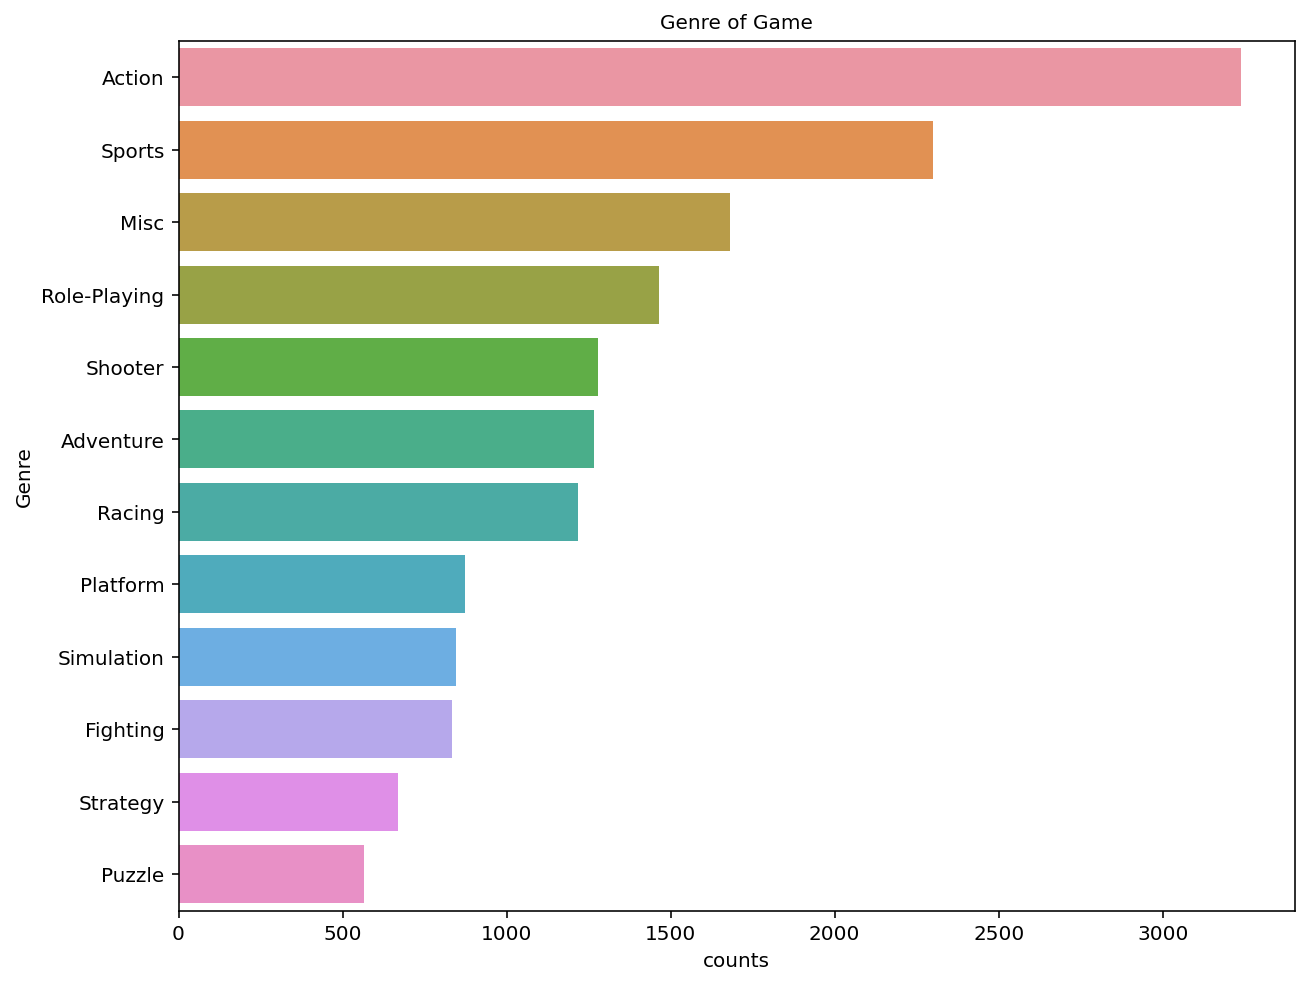

In [23]:
# 주로 많이 출시된 Genre
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')
import warnings
warnings.filterwarnings("ignore")

genre = df.Genre
y_axis= genre.value_counts()
x_axis= y_axis.keys()

fig, ax= plt.subplots(figsize= (10,8))
sns.barplot(y_axis, x_axis)
plt.title('Genre of Game', size= 10)
plt.ylabel('Genre')
plt.xlabel('counts');

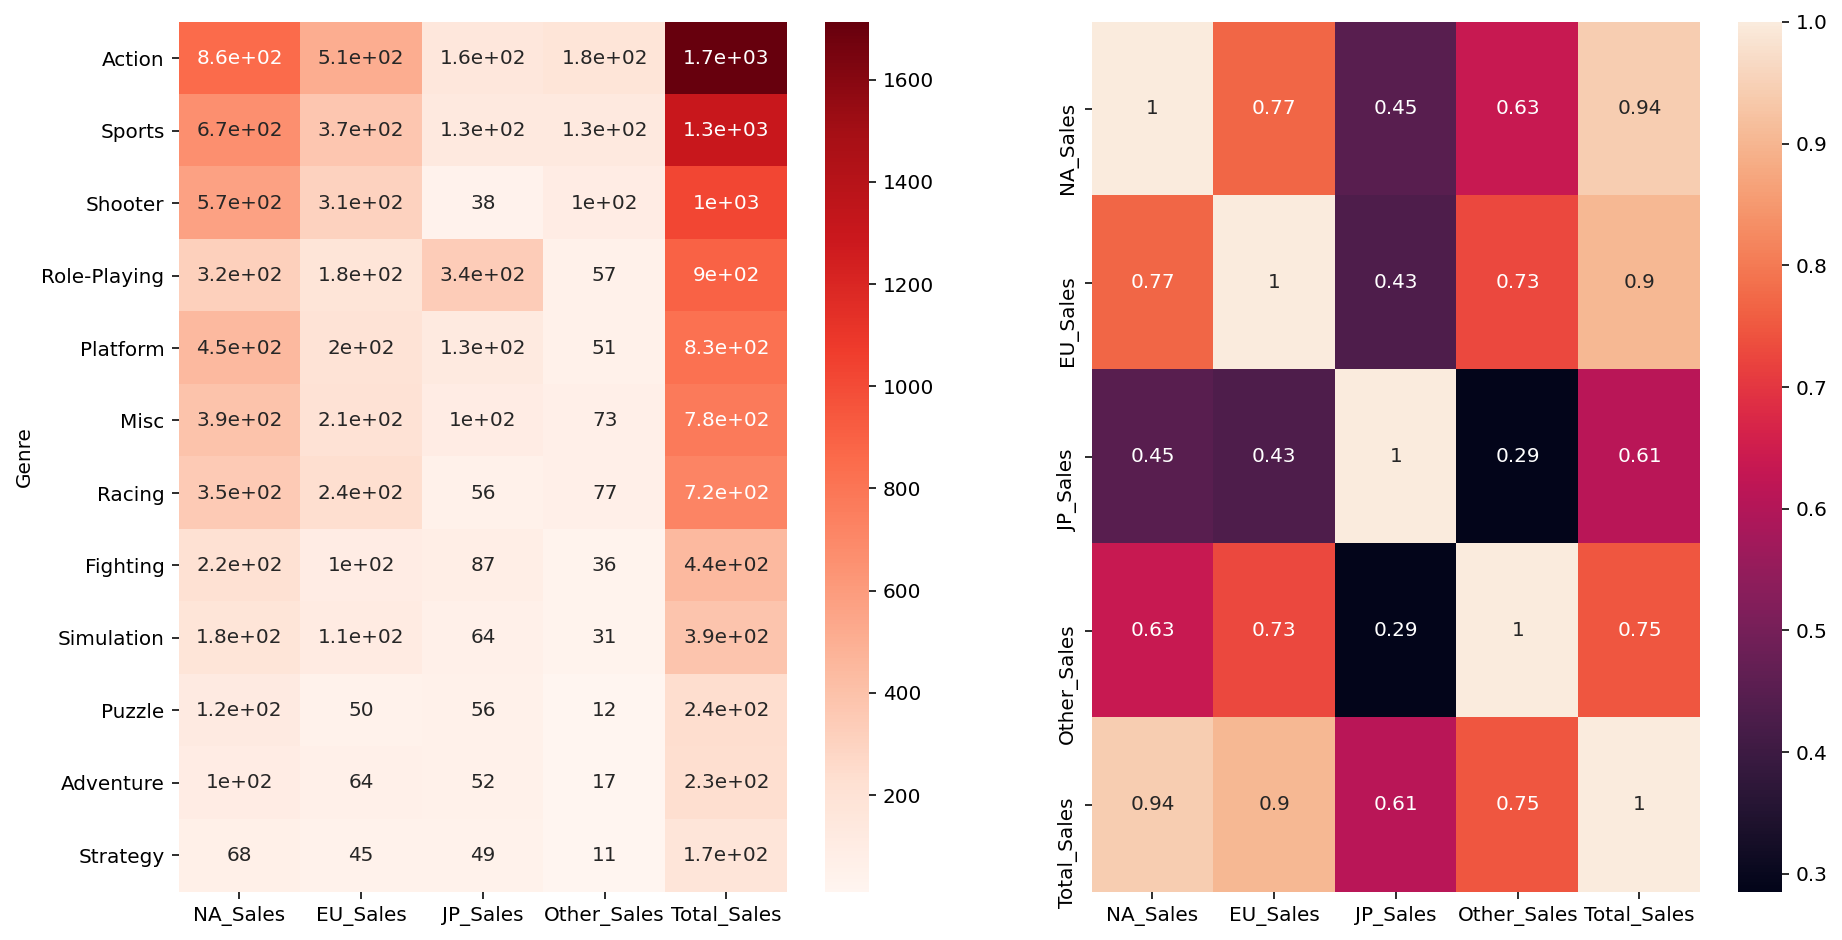

In [27]:
# 장르와 출고량 heatmap

v= df.iloc[:, 5:]
v= pd.concat([df.Genre, v], axis=1)
v_sum= v.groupby('Genre').sum()
v_sum1= v_sum.sort_values('Total_Sales', ascending=False)

# 각 지역별 출고량과 전체 출고량 상관계수 heatmap
v_corr= v.corr()

fig, ax= plt.subplots(1,2, figsize=(15,8))
sns.heatmap(v_sum1, annot=True, cmap= 'Reds', ax=ax[0])
sns.heatmap(v_corr, annot=True,ax=ax[1]);

In [28]:
# 데이터의 통계치 확인 // 평균치와 오차가 너무 심함(이상치)
v.describe()

NA_Sales      EU_Sales      JP_Sales   Other_Sales   Total_Sales
count  16241.000000  16241.000000  16241.000000  16241.000000  16241.000000
mean       0.265195      0.147378      0.078283      0.048234      0.539091
std        0.822431      0.508340      0.309272      0.189678      1.563905
min        0.000000      0.000000      0.000000      0.000000      0.000000
25%        0.000000      0.000000      0.000000      0.000000      0.060000
50%        0.080000      0.020000      0.000000      0.010000      0.170000
75%        0.240000      0.110000      0.040000      0.040000      0.480000
max       41.490000     29.020000     10.220000     10.570000     82.740000

In [29]:
v1= v.groupby('Genre', as_index=False).mean()
v1['NA_M']= (v1.NA_Sales / v1.NA_Sales.sum()) *100
v1['EU_M']= (v1.EU_Sales / v1.EU_Sales.sum()) *100
v1['JP_M']= (v1.JP_Sales / v1.JP_Sales.sum()) *100
v1['Other_M']= (v1.Other_Sales / v1.Other_Sales.sum()) *100
v1['Total_M']= (v1.Total_Sales / v1.Total_Sales.sum()) *100
v1

Genre  NA_Sales  EU_Sales  ...       JP_M    Other_M    Total_M
0         Action  0.265046  0.158531  ...   4.730744  10.718197   8.290412
1      Adventure  0.080276  0.050205  ...   4.003868   2.485820   2.894027
2       Fighting  0.263892  0.119641  ...  10.214423   8.171360   8.329427
3           Misc  0.234819  0.123825  ...   6.065958   8.156064   7.273252
4       Platform  0.510172  0.229817  ...  14.634532  11.123556  14.872353
5         Puzzle  0.214806  0.089170  ...   9.725493   4.148360   6.669336
6         Racing  0.290976  0.192797  ...   4.522116  11.846417   9.294650
7   Role-Playing  0.217584  0.124976  ...  22.911346   7.308827   9.649432
8        Shooter  0.448812  0.242367  ...   2.919501  15.019872  12.553846
9     Simulation  0.214456  0.133558  ...   7.351223   6.987534   7.215402
10        Sports  0.290239  0.161361  ...   5.737263  10.865695   8.903351
11      Strategy  0.101390  0.066996  ...   7.183533   3.168299   4.054512

[12 rows x 11 columns]

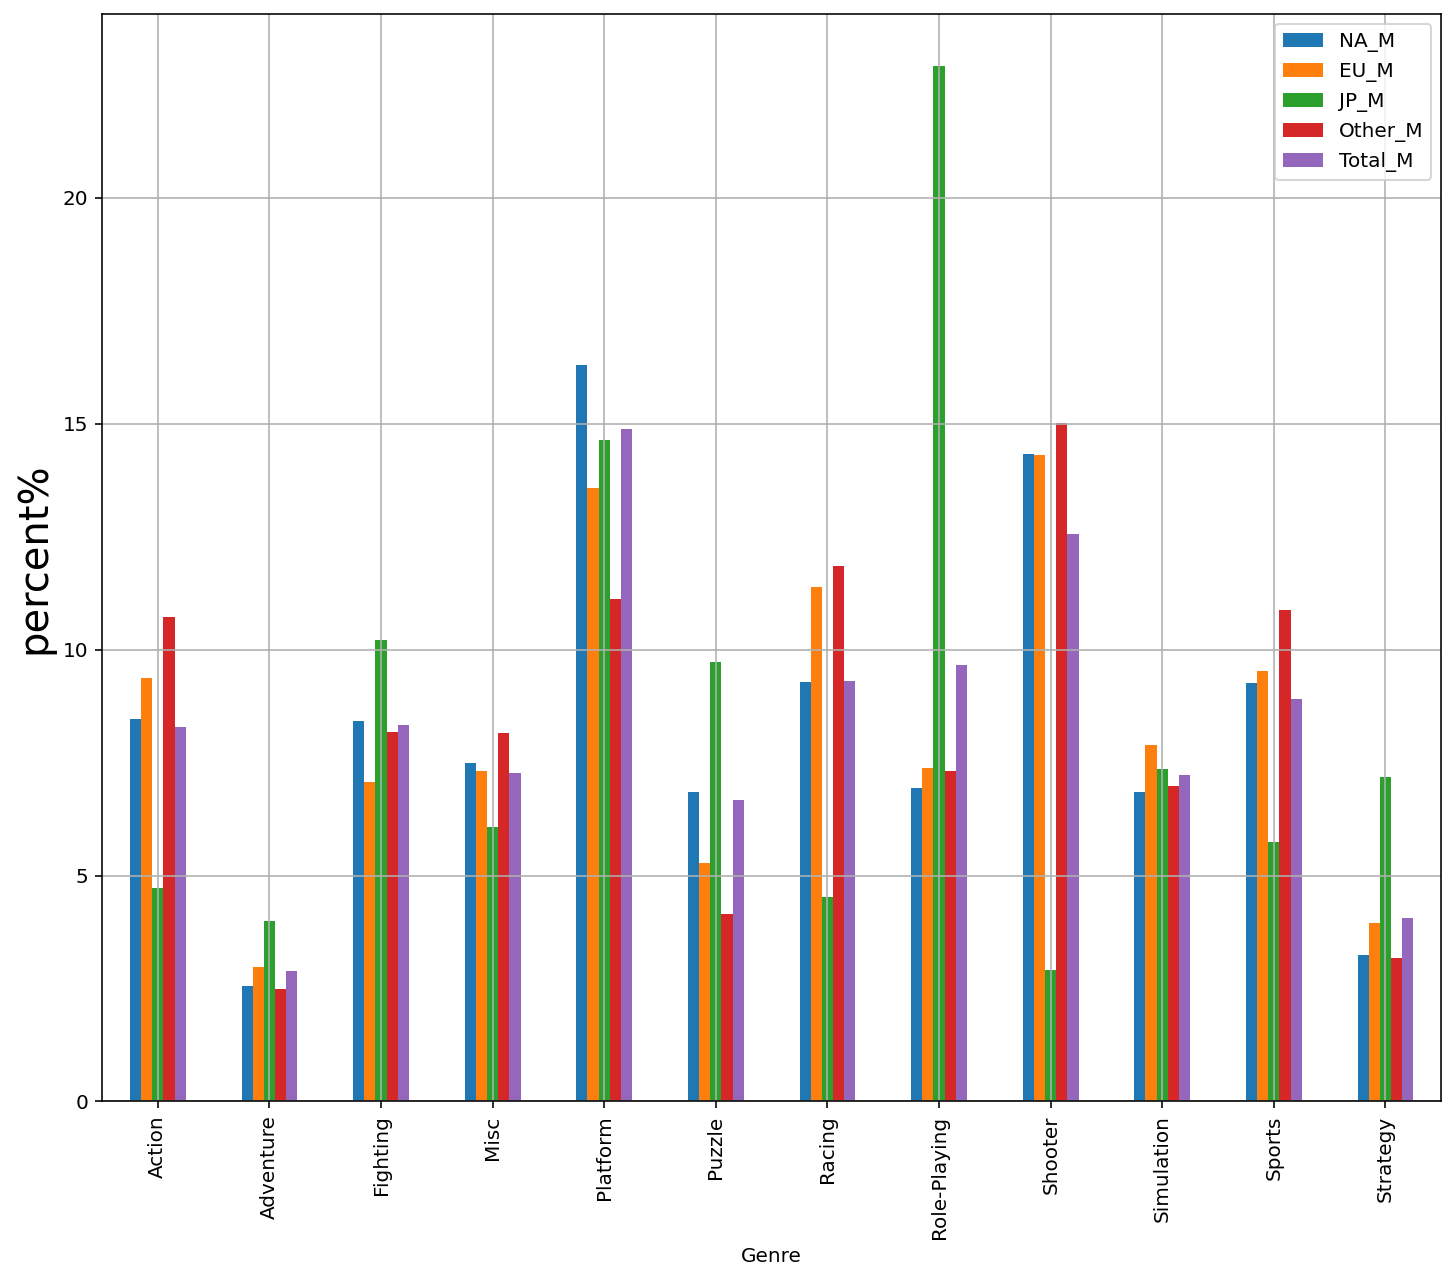

In [30]:
v1_M= v1[['Genre', 'NA_M', 'EU_M', 'JP_M', 'Other_M', 'Total_M']]
v1_M.set_index('Genre', inplace=True)

v1_M.plot.bar(figsize= (12,10));
plt.ylabel('percent%', size= 20)
plt.grid()

In [31]:
year_trend= df[['Platform', 'Year', 'Genre']]
year_trend.head()

Platform  Year     Genre
0     2600  1980   Shooter
1     2600  1980      Misc
2     2600  1980  Fighting
3     2600  1980    Action
4     2600  1980      Misc

In [32]:
Platform_trend= pd.crosstab(year_trend.Year, year_trend.Platform)
Genre_trend= pd.crosstab(year_trend.Year, year_trend.Genre)


print(chi2_contingency(Platform_trend)[1])
print(chi2_contingency(Genre_trend)[1])

# 귀무가설 기각 // 연관이 있다

0.0
0.0


In [33]:
Platform_trend_T= Platform_trend.T
Genre_trend_T= Genre_trend.T

In [ ]:
# 오차를 줄이기 위해서 표준화 시행
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

p_Scaler= scaler.fit_transform(Platform_trend_T)
p_Scaler= pd.DataFrame(p_Scaler, columns= Platform_trend_T.columns, index= Platform_trend_T.index)
p_Scaler

g_Scaler= scaler.fit_transform(Genre_trend_T)
g_Scaler= pd.DataFrame(g_Scaler, columns= Genre_trend_T.columns, index= Genre_trend_T.index)
g_Scaler

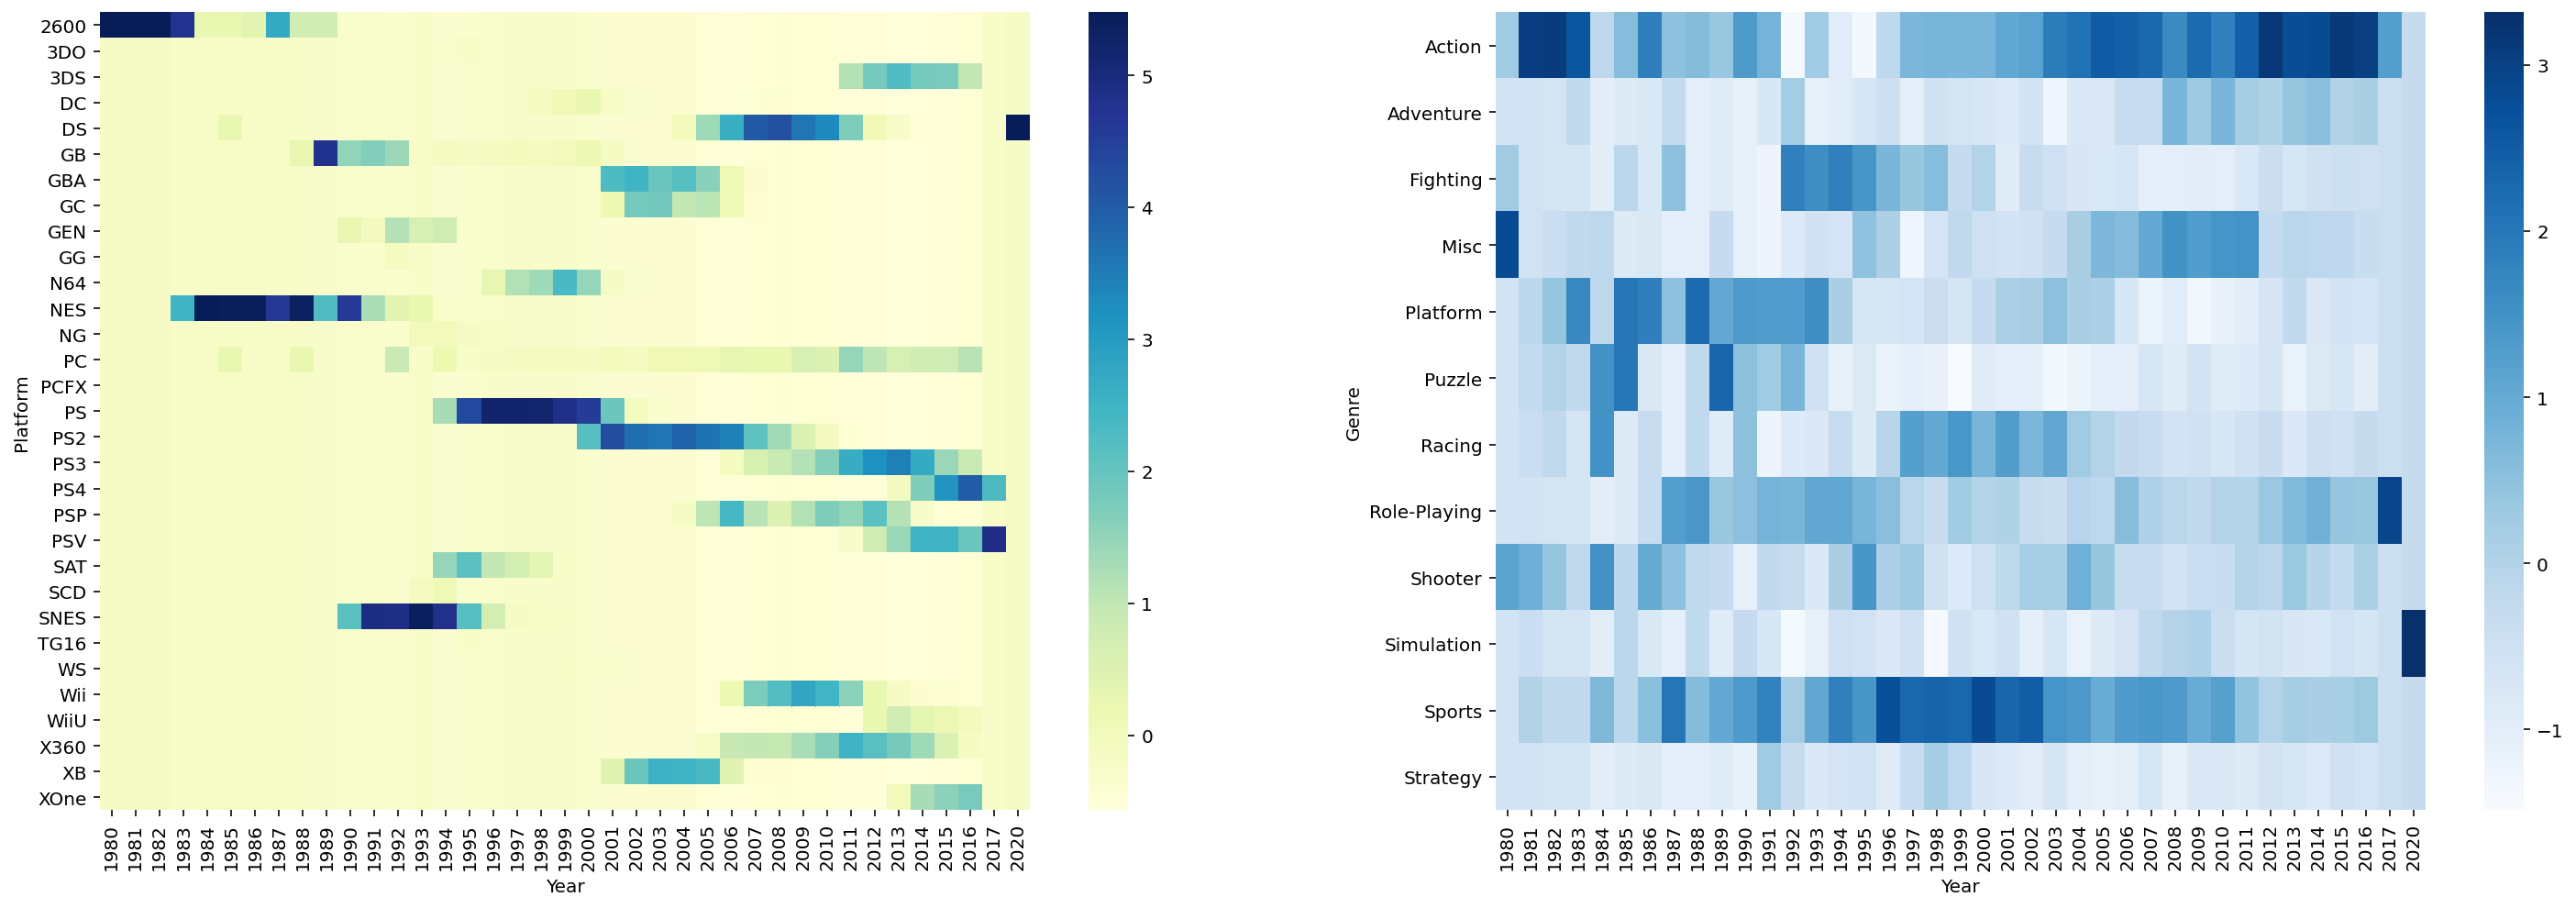

In [35]:
fig, ax= plt.subplots(1,2, figsize=(25,8))
sns.heatmap(p_Scaler, ax=ax[0], cmap="YlGnBu")
sns.heatmap(g_Scaler, ax=ax[1], cmap='Blues')

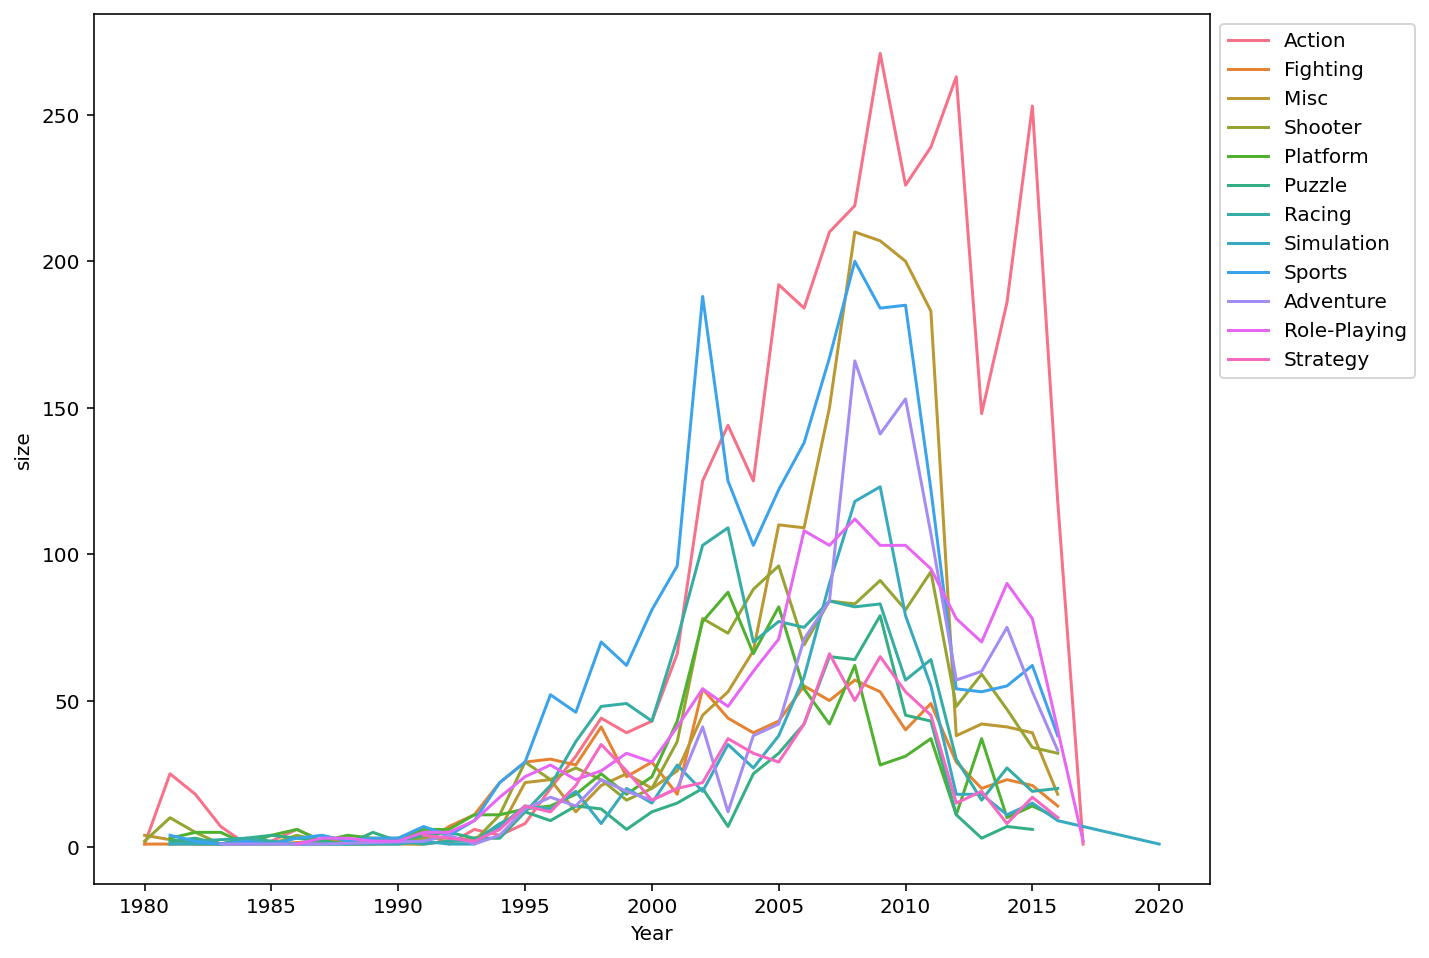

In [36]:
# 연도별 장르 출시 
df_Genre = df.groupby(['Year','Genre'], as_index=False).size()
df_Genre

plt.figure(figsize= (10,8))
sns.lineplot('Year', 'size', data= df_Genre, hue= 'Genre')
plt.legend(bbox_to_anchor=(1, 1))


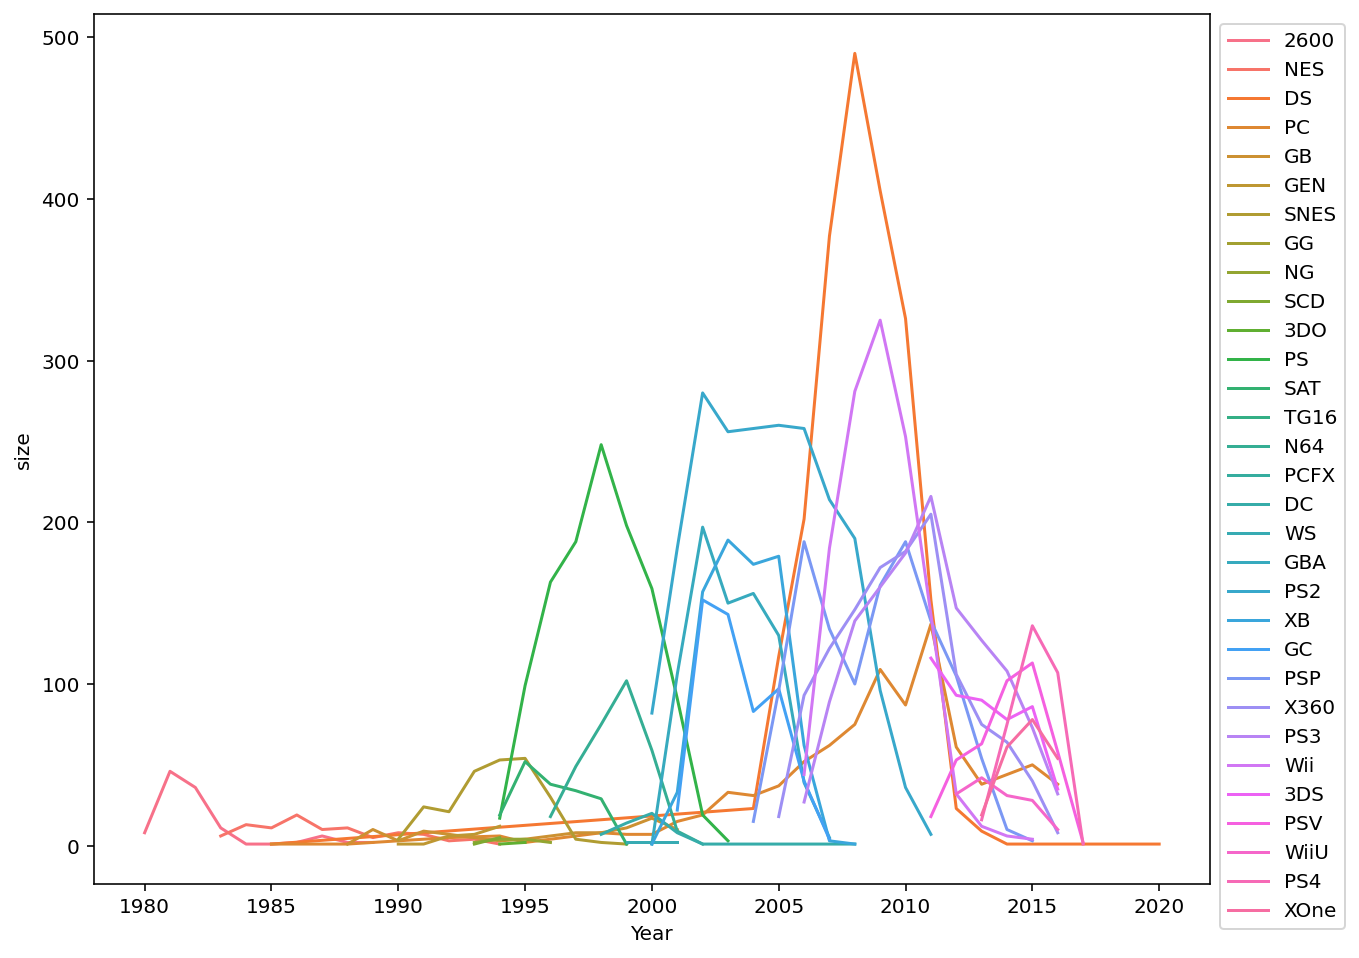

In [37]:
# 연도별 플랫폼 출시
df_platform = df.groupby(['Year','Platform'], as_index=False).size()
df_platform

plt.figure(figsize= (10,8))
sns.lineplot('Year', 'size', data= df_platform, hue= 'Platform')
plt.legend(bbox_to_anchor=(1, 1));

In [38]:
# 출고량이 가장 많았던 게임 
# 많이 출시된 Genre는 Action 이였지만 출고량이 가장 많았던 게임의 Genre는 Sports

a= df['Year'] >= 2000
df_new = df[a]

df_mean = df_new.groupby(['Name','Year', 'Platform', 'Genre', 'Publisher'], as_index=False).mean()
df_mean20= df_mean.sort_values('Total_Sales', ascending=False).head(50)
df_mean20

Name  ...  Total_Sales
13702                                    Wii Sports  ...        82.74
6861                                 Mario Kart Wii  ...        35.83
13704                             Wii Sports Resort  ...        33.00
8384                          New Super Mario Bros.  ...        30.01
13700                                      Wii Play  ...        29.01
8387                      New Super Mario Bros. Wii  ...        28.61
8459                                     Nintendogs  ...        24.75
6860                                  Mario Kart DS  ...        23.43
13695                                       Wii Fit  ...        22.72
13696                                  Wii Fit Plus  ...        22.00
5907                             Kinect Adventures!  ...        21.82
4499                             Grand Theft Auto V  ...        21.39
4508                  Grand Theft Auto: San Andreas  ...        20.81
1265   Brain Age: Train Your Brain in Minutes a Day  ...        20.22
9061                  Pokemon Diamond/Pokemon Pearl  ...        18.35
4500                             Grand Theft Auto V  ...        16.38
4512                    Grand Theft Auto: Vice City  ...        16.15
9074                  Pokemon Ruby/Pokemon Sapphire  ...        15.84
9055                    Pokemon Black/Pokemon White  ...        15.32
1263    Brain Age 2: More Training in Minutes a Day  ...        15.30
4479                         Gran Turismo 3: A-Spec  ...        14.97
1575                 Call of Duty: Modern Warfare 3  ...        14.76
1550                        Call of Duty: Black Ops  ...        14.64
1553                      Call of Duty: Black Ops 3  ...        14.24
1557                     Call of Duty: Black Ops II  ...        14.04
1559                     Call of Duty: Black Ops II  ...        13.74
1571                 Call of Duty: Modern Warfare 2  ...        13.52
1573                 Call of Duty: Modern Warfare 3  ...        13.47
4495                           Grand Theft Auto III  ...        13.10
11565                       Super Smash Bros. Brawl  ...        13.04
1548                        Call of Duty: Black Ops  ...        12.73
411                     Animal Crossing: Wild World  ...        12.28
6858                                   Mario Kart 7  ...        12.21
4732                                         Halo 3  ...        12.14
4501                             Grand Theft Auto V  ...        11.99
9063           Pokemon HeartGold/Pokemon SoulSilver  ...        11.90
4480                                 Gran Turismo 4  ...        11.65
11503                            Super Mario Galaxy  ...        11.52
9068      Pokemon Omega Ruby/Pokemon Alpha Sapphire  ...        11.33
4498                            Grand Theft Auto IV  ...        11.03
11497                           Super Mario 3D Land  ...        10.79
4482                                 Gran Turismo 5  ...        10.77
1570                 Call of Duty: Modern Warfare 2  ...        10.69
4497                            Grand Theft Auto IV  ...        10.58
9062              Pokemon FireRed/Pokemon LeafGreen  ...        10.49
11499                                Super Mario 64  ...        10.42
5686                                   Just Dance 3  ...        10.27
1567                           Call of Duty: Ghosts  ...        10.21
4741                                    Halo: Reach  ...         9.87
8385                        New Super Mario Bros. 2  ...         9.83

[50 rows x 10 columns]

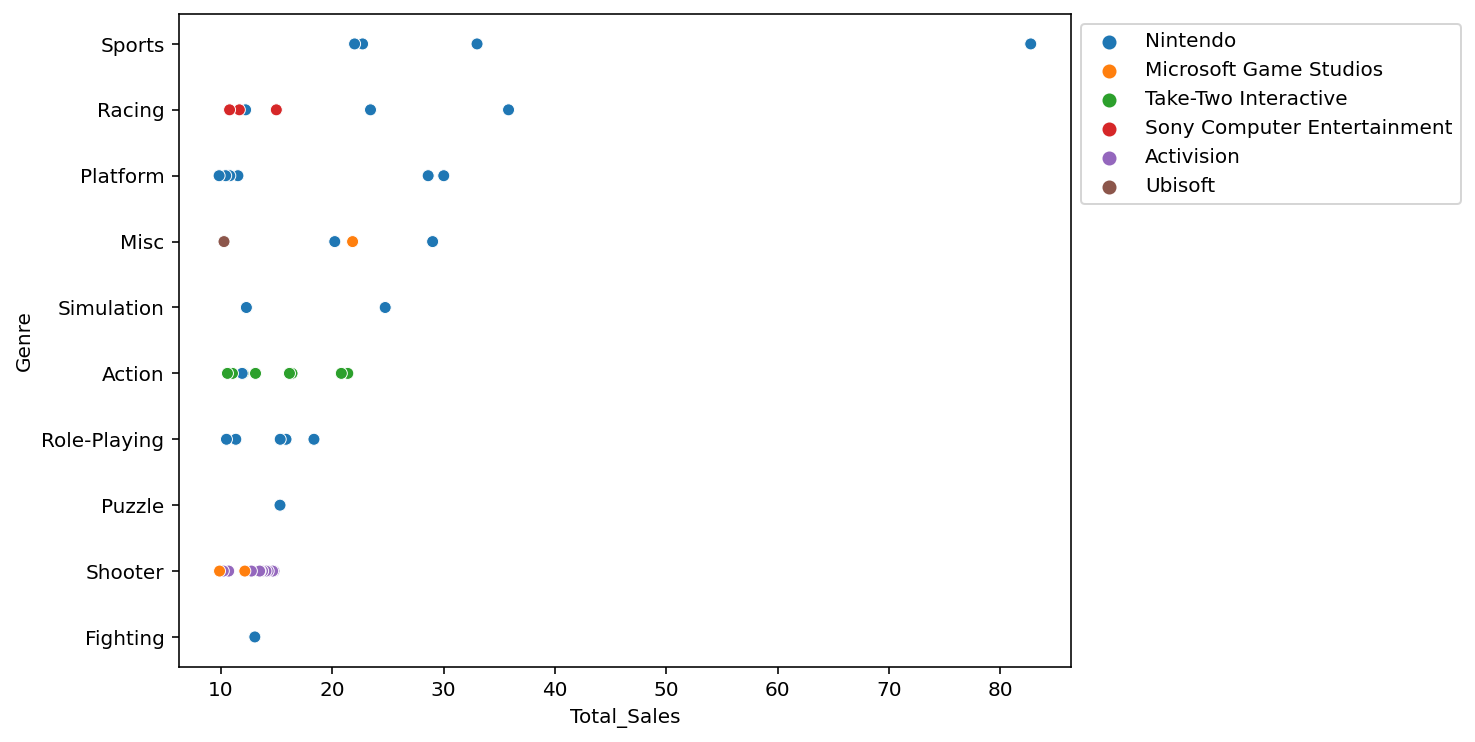

In [39]:
plt.figure(figsize= (8,6))
sns.scatterplot('Total_Sales', 'Genre', data=df_mean20, hue='Publisher')
plt.legend(bbox_to_anchor=(1, 1));

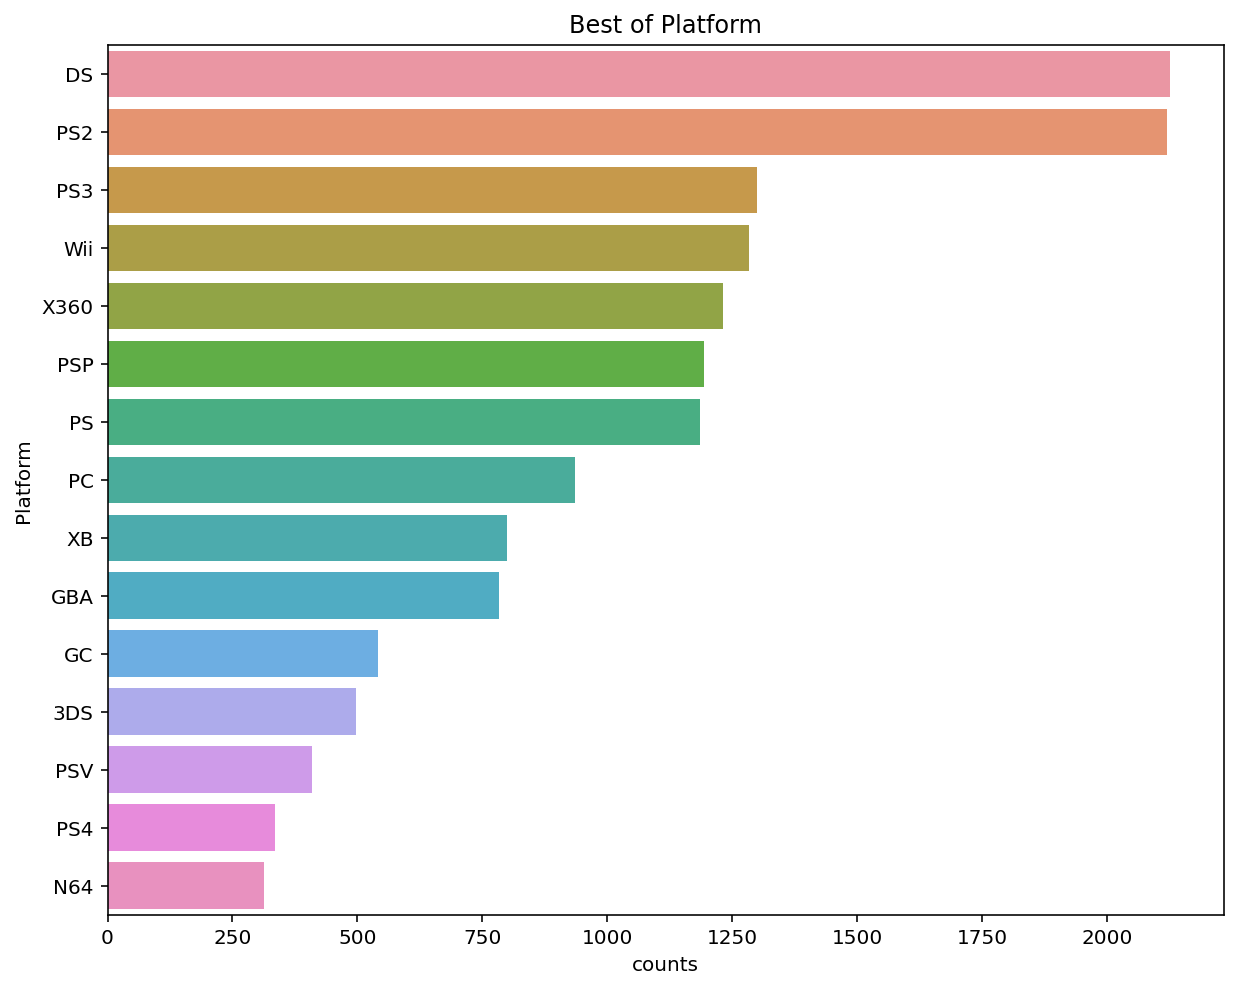

In [40]:
# 가장 많이 사용된 Platform 상위 15개
platform= df.Platform
y= platform.value_counts().head(15)
x= y.keys()

plt.figure(figsize=(10,8))
sns.barplot(y, x)
plt.xlabel('counts')
plt.ylabel('Platform')
plt.title('Best of Platform');

In [63]:
df_prefer= df_new[['Publisher', 'Platform', 'Genre', 'Total_Sales']]
df_prefer['count']= 1
df_prefer1= df_prefer.groupby(['Publisher', 'Platform', 'Genre'])
df_prefer1= df_prefer1.sum()
df_prefer1.sort_values('Total_Sales', ascending=False).head(20)

Total_Sales  count
Publisher                   Platform Genre                           
Nintendo                    Wii      Sports             169.18     11
Electronic Arts             PS2      Sports             124.50     99
Activision                  X360     Shooter            101.97     31
                            PS3      Shooter             87.69     26
Nintendo                    DS       Role-Playing        85.85     35
Electronic Arts             PS3      Sports              77.53     64
                            X360     Sports              75.30     73
Nintendo                    DS       Misc                67.75     40
                            Wii      Platform            66.39     11
Take-Two Interactive        PS2      Action              66.00     21
Microsoft Game Studios      X360     Shooter             65.49     14
Ubisoft                     Wii      Misc                62.85     46
Nintendo                    DS       Platform            53.82     14
                            Wii      Misc                50.70     13
                            GBA      Role-Playing        46.53     20
Take-Two Interactive        PS3      Action              45.84      9
Nintendo                    DS       Puzzle              45.34     25
Sony Computer Entertainment PS3      Action              44.35     31
Take-Two Interactive        X360     Action              43.15     12
Electronic Arts             PS2      Racing              41.60     29

In [43]:
df_prefer1.sort_values('count', ascending=False).head(20)

Total_Sales  count
Publisher                    Platform Genre                         
Electronic Arts              PS2      Sports           124.50     99
                             X360     Sports            75.30     73
Konami Digital Entertainment PS2      Sports            39.17     65
Ubisoft                      DS       Simulation        30.81     65
Electronic Arts              PS3      Sports            77.53     64
                             XB       Sports            26.83     59
Sony Computer Entertainment  PS2      Misc              33.95     51
Idea Factory                 PSP      Adventure          1.40     47
Ubisoft                      Wii      Misc              62.85     46
Sony Computer Entertainment  PS2      Sports            17.09     45
Electronic Arts              PC       Simulation        36.24     45
Activision                   X360     Action            23.71     42
Electronic Arts              GC       Sports            10.77     42
Ubisoft                      DS       Misc              10.76     40
Electronic Arts              PSP      Sports            17.54     40
Nintendo                     DS       Misc              67.75     40
Namco Bandai Games           3DS      Action             3.34     40
                             DS       Action             2.93     39
                             PS3      Action             7.45     38
THQ                          GBA      Action            16.34     38

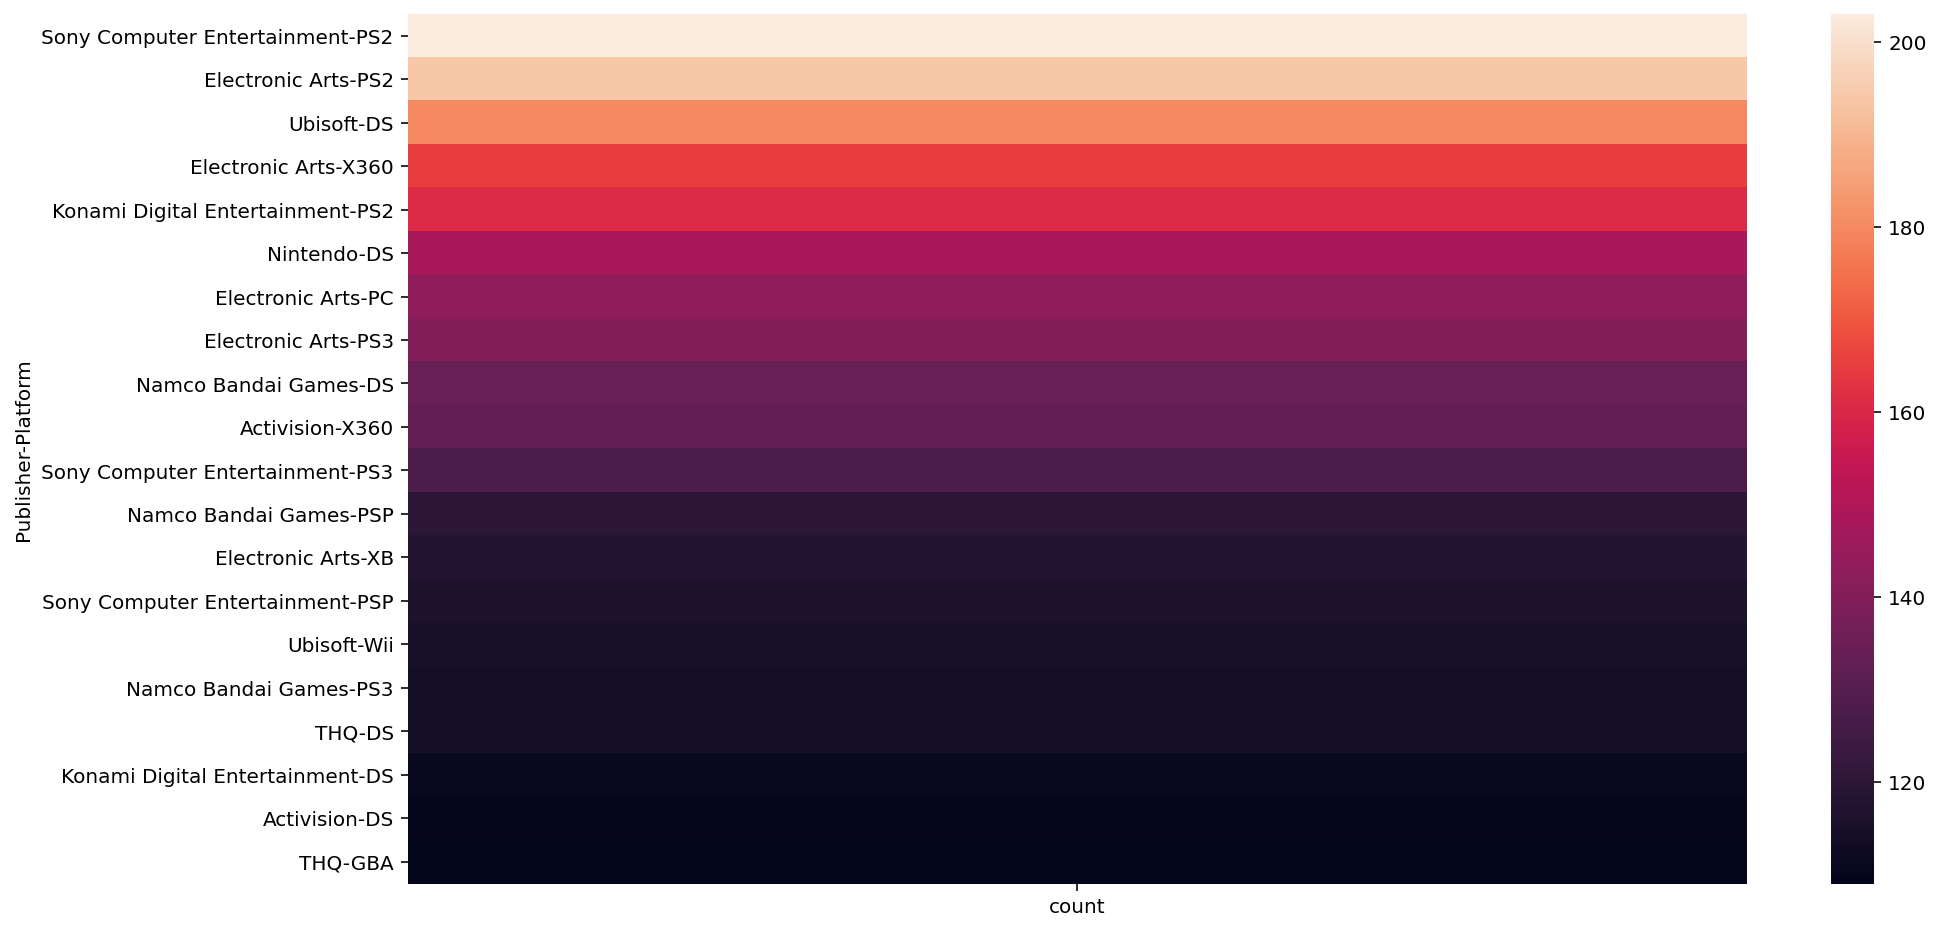

In [98]:
# 회사마다 플랫폼, 장르를 통한 출고개수

reg1= df_prefer.groupby(['Publisher', 'Platform']).sum()
reg1= reg1.sort_values('count', ascending=False)
reg1= reg1.head(20)
reg1.drop('Total_Sales', axis=1, inplace=True)

reg2= df_prefer.groupby(['Publisher', 'Genre']).sum()
reg2= reg2.sort_values('count', ascending=False)
reg2= reg2.head(20)
reg2.drop('Total_Sales', axis=1, inplace=True)

fig, ax= plt.subplots(figsize= (15,8))
sns.heatmap(reg1)

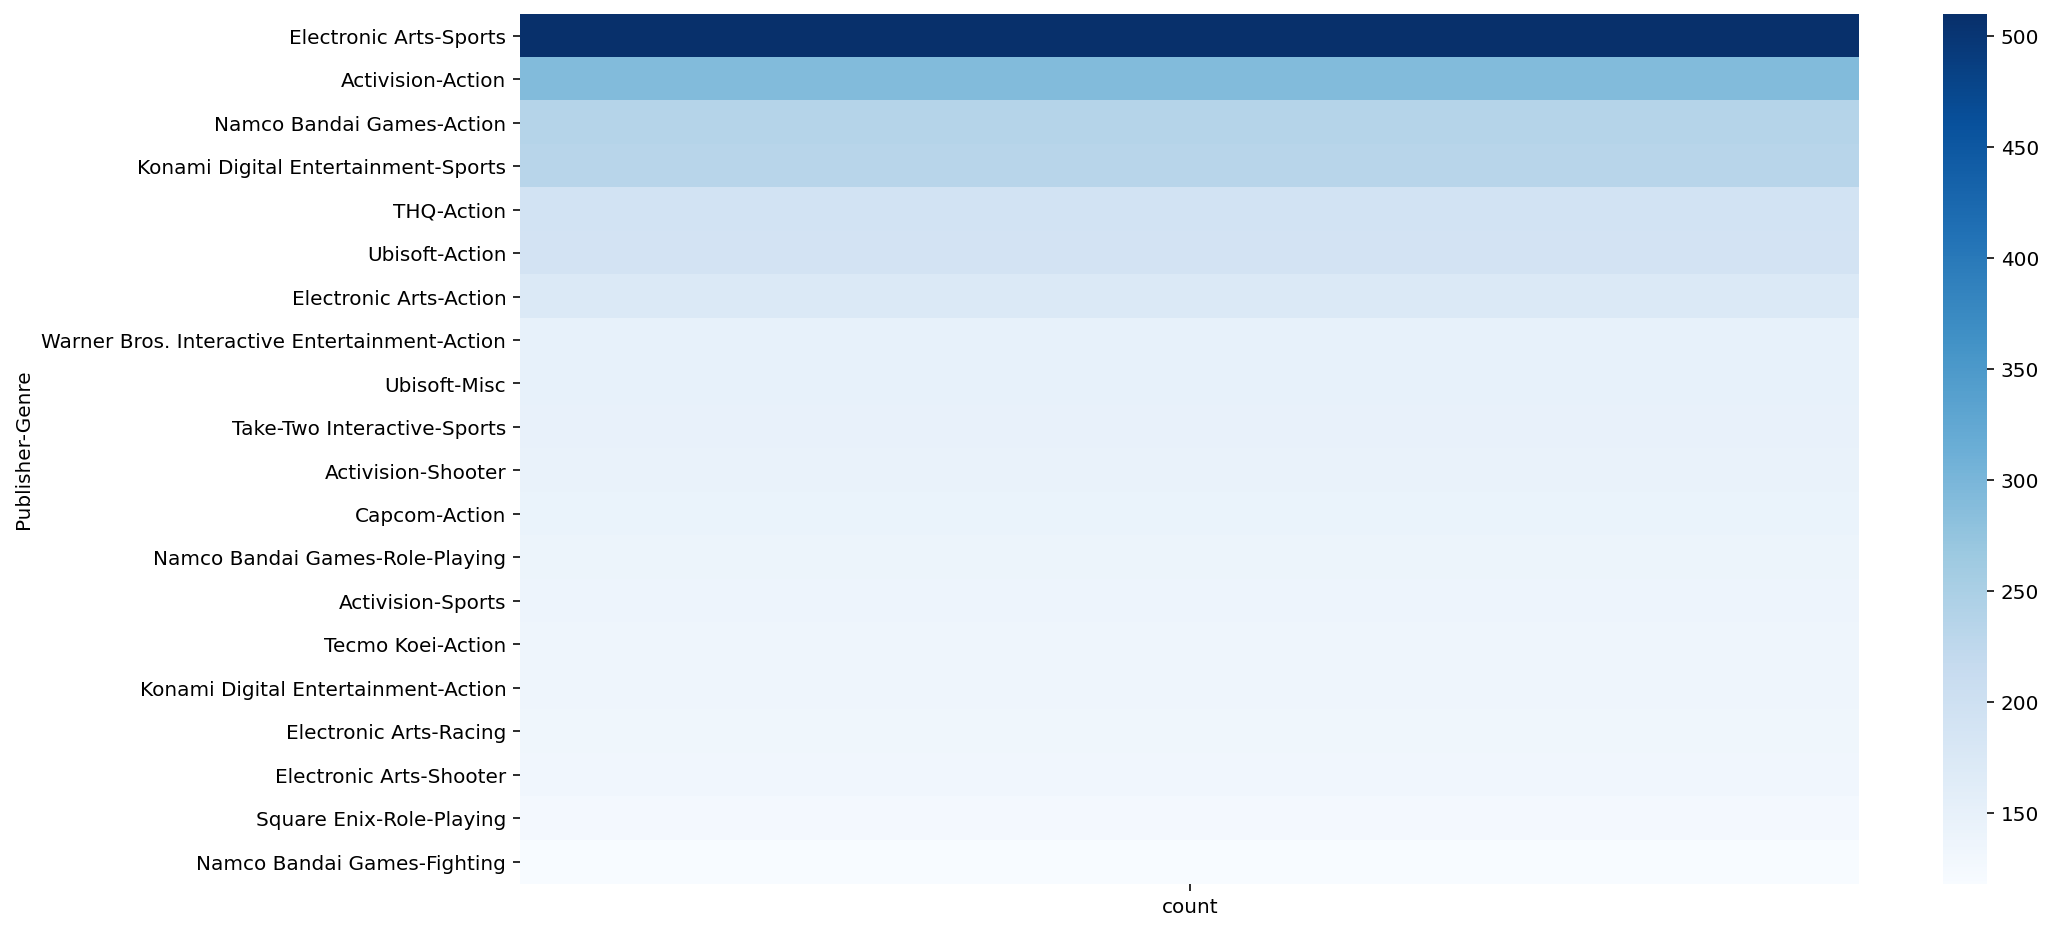

In [101]:
fig, ax= plt.subplots(figsize= (15,8))
sns.heatmap(reg2, cmap='Blues')

In [ ]:
# 게임 개발사 추이 확인(= 개발사가 너무 많기 때문에 확인이 어려움)
# 가장 많은 출고량을 보여주는 게임회사 상위 10개만 파악

df_Publisher= df.groupby('Publisher').sum()
df_Publisher.drop('Year', axis=1, inplace=True)
df_Publisher.sort_values('Total_Sales', ascending= False, inplace=True)

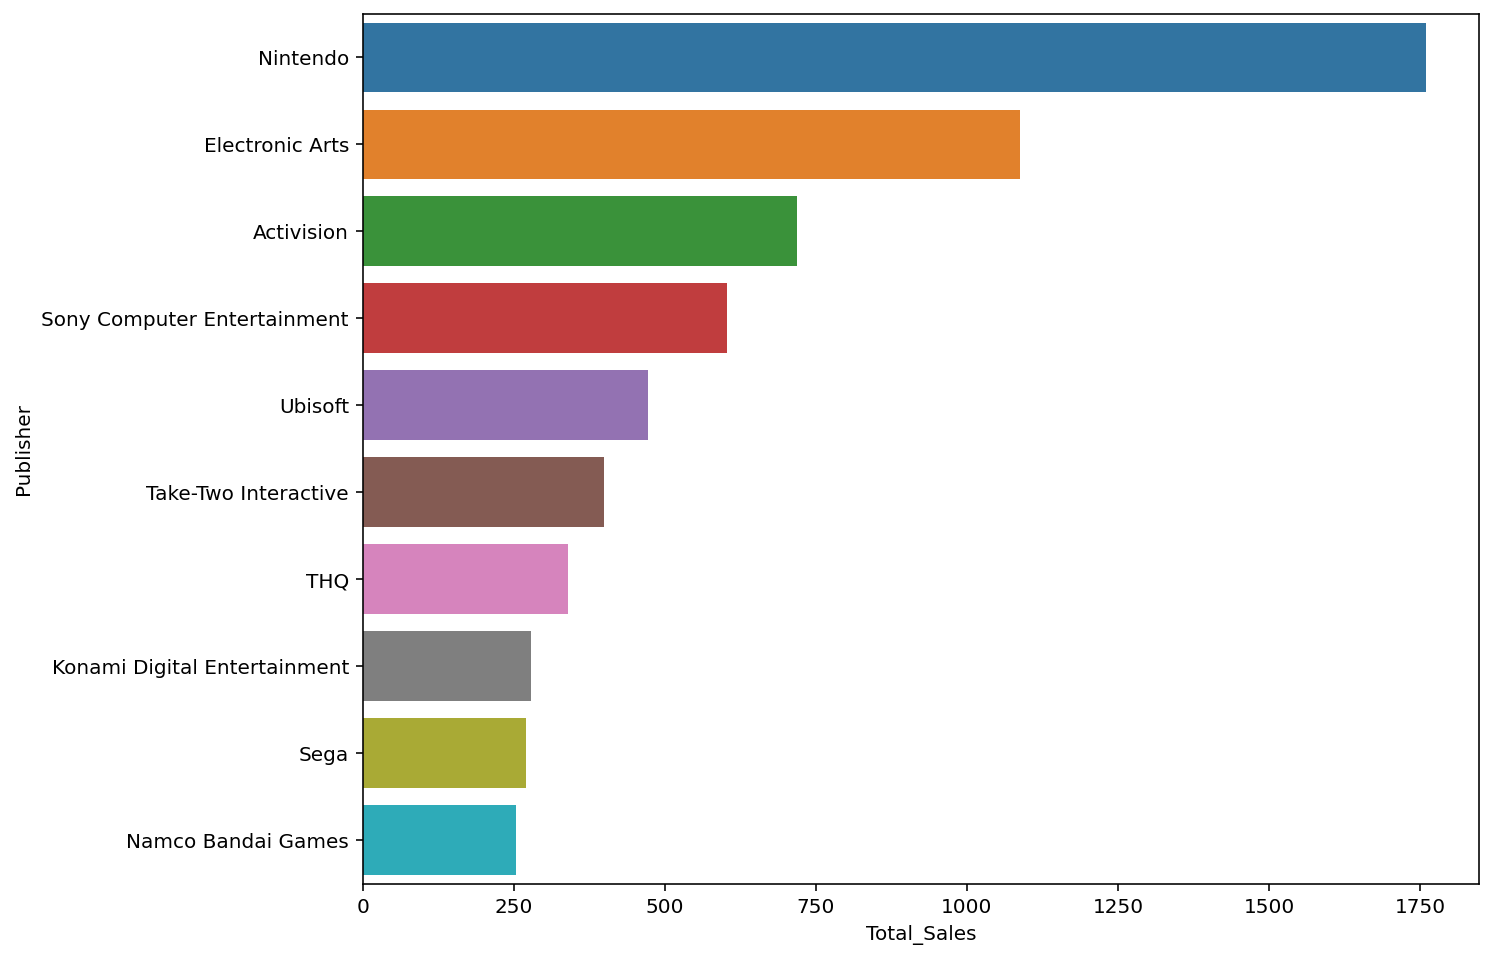

In [ ]:
df_Publisher20= df_Publisher.head(10)
plt.figure(figsize=(10,8))
sns.barplot( df_Publisher20.Total_Sales, df_Publisher20.index);